## Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [23]:
from sklearn.datasets import fetch_openml

X_,y_ = fetch_openml("mnist_784", version=1, return_X_y=True)
# X = mnist.data / 255.0
# y = mnist.target

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

### Grading

This homework is due **March 22, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
#from ggplot import *

In [5]:
# import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
# lets looka t the data, make sure it makes sense
train.head()
# the zeros are whitespace

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# we see that our target is 'label' so we'll save that
y = train['label']
X = train.drop('label', axis=1).copy() / 255.0

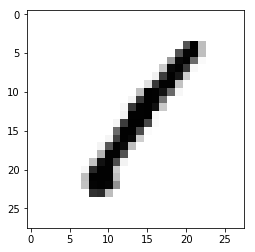

In [9]:
plt.imshow(X.loc[0].values.reshape(28,28), cmap="Greys")

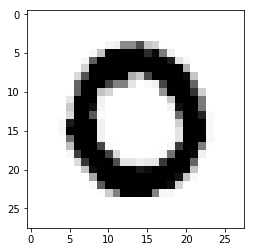

In [10]:
plt.imshow(X.loc[1].values.reshape(28,28), cmap="Greys")

In [11]:
X.shape

(42000, 784)

# PCA

In [12]:
pca2 = PCA(n_components=2)
X_2dim = pca2.fit_transform(X)

In [13]:
X_2dim.shape

(42000, 2)

In [14]:
pca2.explained_variance_ratio_

array([0.09748938, 0.07160266])

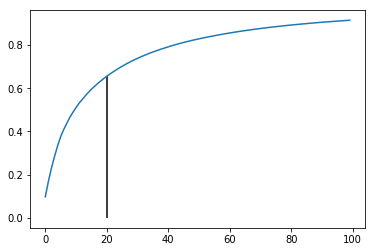

In [15]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

In [16]:
# lets see how much is needed to show 90 percent of the variance
index_90 = np.argmax(cum_ratio >= 0.90)
print(index_90)
print(cum_ratio[index_90])

86
0.9005487279617018


In [17]:
# lets see if it works
pca90 = PCA(n_components=0.90)
X_pca90 = pca90.fit_transform(X)
print(X_pca90.shape)


(42000, 87)


# T-SNE

### Perplexity = 2

In [17]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

# perplexity 2
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 9.596s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 156.034063
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.777657
[t-SNE] KL divergence after 1000 iterations: 1.889212


In [18]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


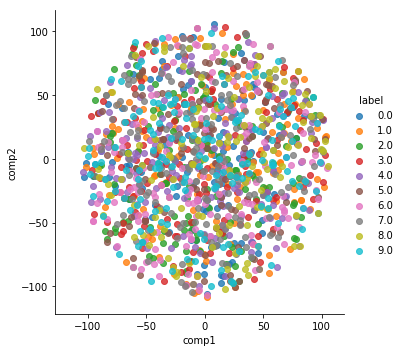

In [19]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)


### Perplexity = 5

In [20]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 9.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 237.049837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.657333
[t-SNE] KL divergence after 1000 iterations: 1.923019


In [21]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


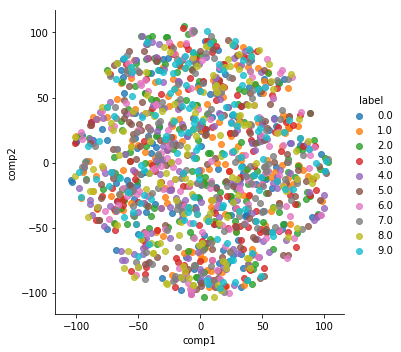

In [22]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### Perplexity = 30

In [23]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 13.498s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 338.688382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.434753
[t-SNE] KL divergence after 1000 iterations: 1.771440


In [24]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


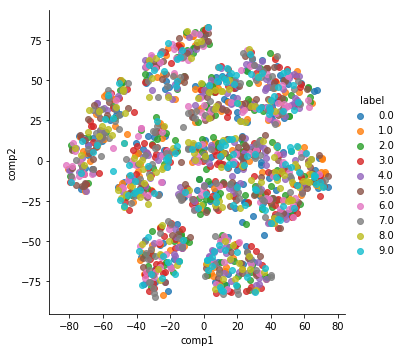

In [25]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### Perplexity = 50

In [27]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.017s...
[t-SNE] Computed neighbors for 10000 samples in 13.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 347.682607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.898186
[t-SNE] KL divergence after 1000 iterations: 1.690897


In [28]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


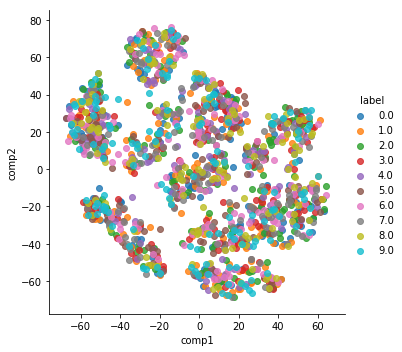

In [29]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### Perplexity = 100

In [37]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 13.843s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 378.149069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.777443
[t-SNE] KL divergence after 1000 iterations: 1.531623


In [40]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


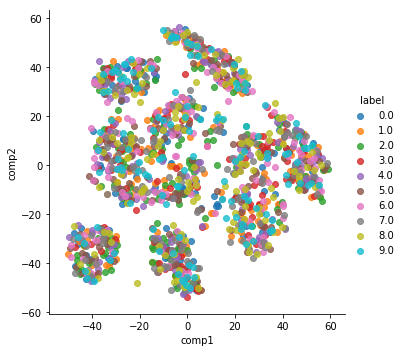

In [41]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

# K-Means clustering

## n_clusters = 10 for label and pixel100

In [26]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
sk_clusters = kmeans.predict(train)

(0, 255)

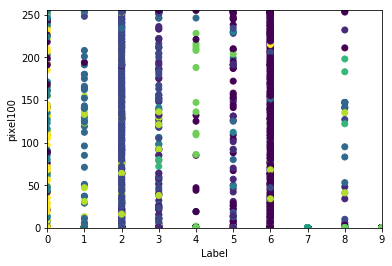

In [28]:
# lets look at the clsuters between the label and a random pixel
plt.scatter(train['label'], train['pixel100'], c=sk_clusters)
plt.xlabel("Label")
plt.ylabel("pixel100")
plt.xlim(0,9)
plt.ylim(0,255)
#plt.plot(range(120000), range(120000))

(0, 255)

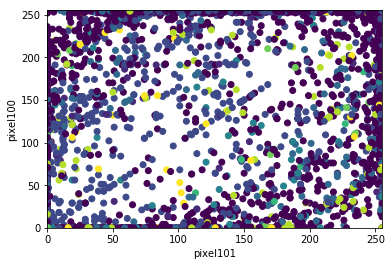

In [29]:
# lets look at the clusters of pixels next to each other
plt.scatter(train['pixel101'], train['pixel100'], c=sk_clusters)
plt.xlabel("pixel101")
plt.ylabel("pixel100")
plt.xlim(0,255)
plt.ylim(0,255)

(0, 255)

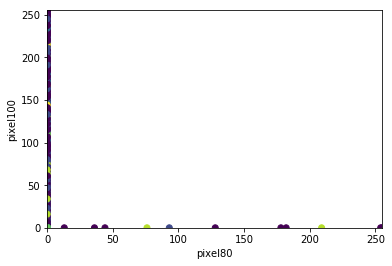

In [30]:
# lets look at the clsuter of two random pixels
plt.scatter(train['pixel80'], train['pixel100'], c=sk_clusters)
plt.xlabel("pixel80")
plt.ylabel("pixel100")
plt.xlim(0,255)
plt.ylim(0,255)

In [31]:
# lets train on just the label and a pixel
kmeans2 = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans2.fit(train[['label', 'pixel100']])
sk_clusters2 = kmeans2.predict(train[['label', 'pixel100']])

(0, 255)

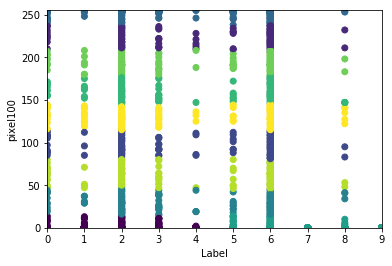

In [32]:
# what cluster do we get
plt.scatter(train['label'], train['pixel100'], c=sk_clusters2)
plt.xlabel("Label")
plt.ylabel("pixel100")
plt.xlim(0,9)
plt.ylim(0,255)
#plt.plot(range(120000), range(120000))

(0, 255)

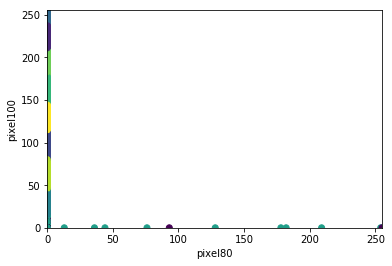

In [33]:
# lets look at the clsuter of two random pixels
plt.scatter(train['pixel80'], train['pixel100'], c=sk_clusters2)
plt.xlabel("pixel80")
plt.ylabel("pixel100")
plt.xlim(0,255)
plt.ylim(0,255)

(0, 255)

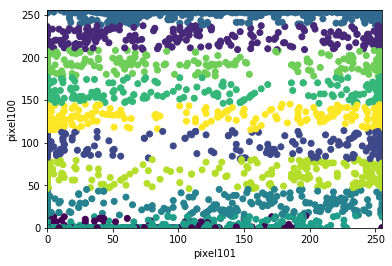

In [34]:
# lets look at the clusters of pixels next to each other
plt.scatter(train['pixel101'], train['pixel100'], c=sk_clusters2)
plt.xlabel("pixel101")
plt.ylabel("pixel100")
plt.xlim(0,255)
plt.ylim(0,255)

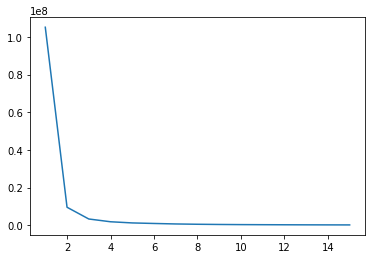

In [35]:
# lets see if something other than 10 looks good
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(train[['label', 'pixel100']])
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

In [ ]:
# so I might pick 4 except I know I want 10 clsuters as that's the number of digits

# Hierarchical Clustering

In [24]:
#allow for a random sample of 100 observations from the MNIST data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select_100 = 100

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

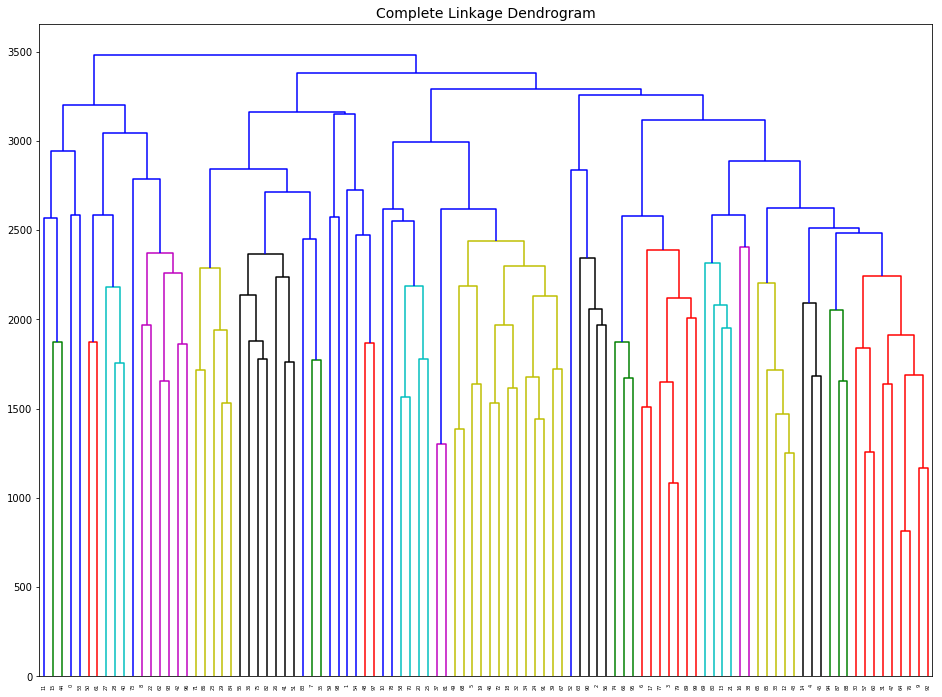

In [25]:
Z = linkage(X_[rows[:n_select_100],:], 'complete')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Complete Linkage Dendrogram", fontsize=14)

In [ ]:
print('Hello world')

Text(0.5, 1.0, 'Ward Linkage Dendrogram')

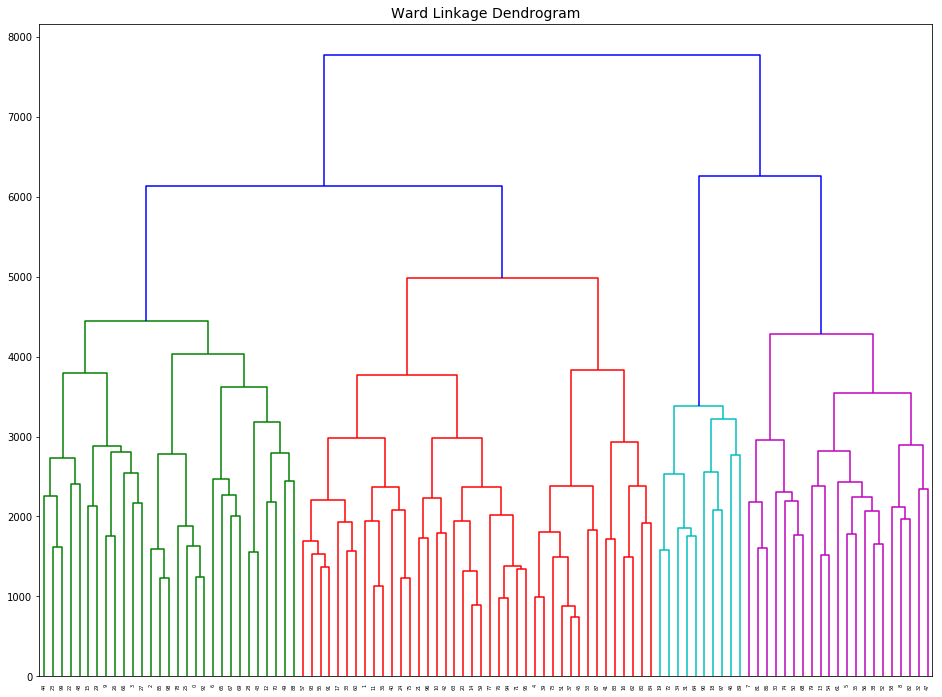

In [38]:
Z = linkage(X_[rows[:n_select_100],:], 'ward')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Ward Linkage Dendrogram", fontsize=14)

Text(0.5, 1.0, 'Single Linkage Dendrogram')

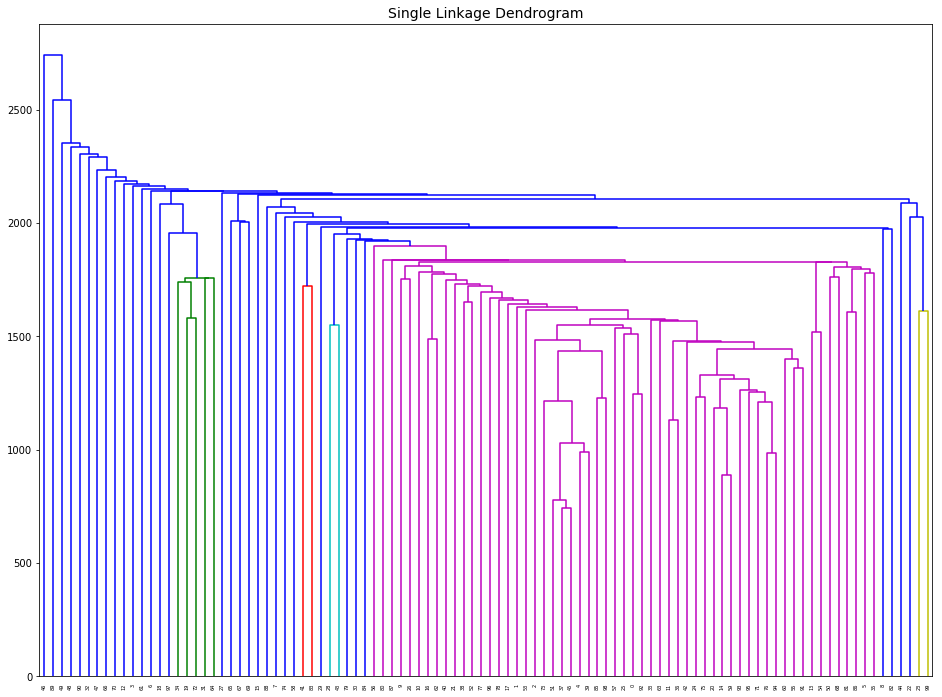

In [39]:
Z = linkage(X_[rows[:n_select_100],:], 'single')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Single Linkage Dendrogram", fontsize=14)